In [24]:
import numpy as np
import math
import pandas as pd
from statistics import mean
from statistics import median
from statistics import stdev
from statistics import variance

In [2]:
data = pd.read_csv('midterm_marks')

In [4]:
data.columns = ['obs', 'marks']

In [5]:
data

,obs,marks
0,1,15.0
1,2,18.0
2,3,27.0
3,4,20.0
4,5,15.0
...,...,...
93,94,7.0
94,95,24.0
95,96,6.5
96,97,22.0


In [7]:
mean(data['marks'])

17.5

In [10]:
median(data['marks'])

18.25

In [11]:
variance(data['marks'])

53.8041237113402

In [12]:
np.quantile(data['marks'], 0.25)

12.125

In [13]:
np.quantile(data['marks'], 0.5)

18.25

In [14]:
np.quantile(data['marks'], 0.75)

24.0

In [15]:
min(data['marks'])

0.5

In [16]:
max(data['marks'])

28.0

In [17]:
data['marks'].describe()

count    98.000000
mean     17.500000
std       7.335129
min       0.500000
25%      12.125000
50%      18.250000
75%      24.000000
max      28.000000
Name: marks, dtype: float64

In [18]:
variance(data['marks'])

53.8041237113402

In [21]:
stdev(data['marks'])

7.335129427034005

In [22]:
q75, q25 = np.percentile(data['marks'], [75, 25])

In [23]:
iqr = q75 - q25
iqr

11.875

In [43]:
def skewness(x):
    n = len(x)
    x_bar = mean(x)
    m2 = 0
    m3 = 0
    for num in x:
        m2 += ((num - x_bar) ** 2)
        m3 += ((num - x_bar) ** 3)
    m2 /= n
    m3 /= n
    return (math.sqrt(n * (n - 1)) / (n - 2)) * (m3 / (m2 ** 1.5))

In [44]:
skewness(data['marks'])

-0.42051131675022363

In [45]:
def kurtosis(x):
    n = len(x)
    x_bar = mean(x)
    m2 = 0
    m4 = 0
    for num in x:
        m2 += ((num - x_bar) ** 2)
        m4 += ((num - x_bar) ** 4)
    m2 /= n
    m4 /= n
    return ((n - 1) / ((n - 2) * (n - 3))) * ((m4 * (n + 1)) / m2 ** 2 - 3 * (n - 1))

In [46]:
kurtosis(data['marks'])

-0.6471976744377083

In [48]:
import matplotlib.pyplot as plt

In [50]:
midterm = data['marks']

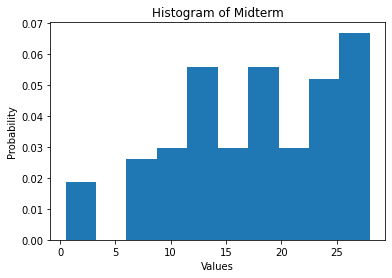

In [61]:
plt.hist(midterm, density = True, bins = None)
plt.title('Histogram of Midterm')
plt.xlabel('Values')
plt.ylabel('Probability')
plt.show()

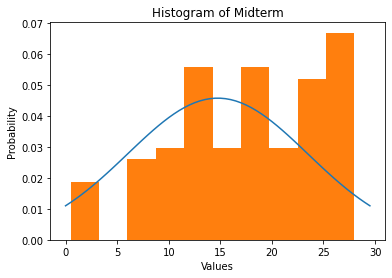

In [70]:
import scipy.stats as scst
x = list(np.arange(0, 30, 0.5))
y = scst.norm.pdf(l, loc = mean(x), scale = stdev(x))
plt.plot(l, y)
plt.hist(midterm, density = True)
plt.title("Histogram of Midterm")
plt.xlabel("Values")
plt.ylabel("Probability")
plt.show()

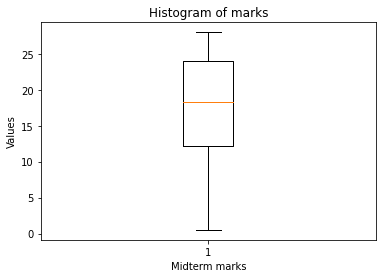

In [72]:
plt.boxplot(midterm)
plt.title("Histogram of marks")
plt.xlabel("Midterm marks")
plt.ylabel("Values")
plt.show()

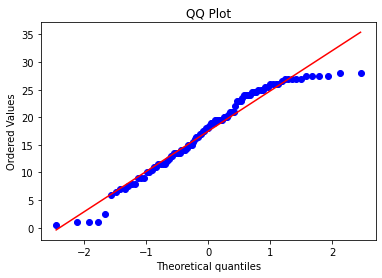

In [75]:
import pylab
scst.probplot(midterm, dist = "norm", plot = pylab)
pylab.title('QQ Plot')
pylab.show()

In [76]:
final = pd.read_csv('final_marks')

In [78]:
final.columns = ['obs', 'finals']

In [86]:
final = final['finals']

In [84]:
midterm

0     15.0
1     18.0
2     27.0
3     20.0
4     15.0
      ... 
93     7.0
94    24.0
95     6.5
96    22.0
97    27.5
Name: marks, Length: 98, dtype: float64

In [92]:
np.corrcoef(midterm, final)[0, 1]

0.7778647904098349

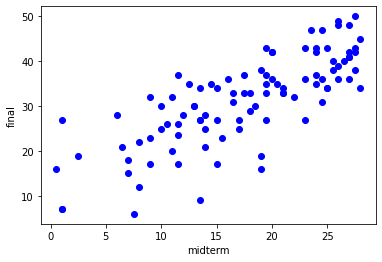

In [94]:
plt.scatter(midterm, final, label = "Midterm / Final Scatter Plot", color = "b")
plt.xlabel("midterm")
plt.ylabel("final")
plt.show()

<AxesSubplot:title={'center':'energy'}, xlabel='type'>

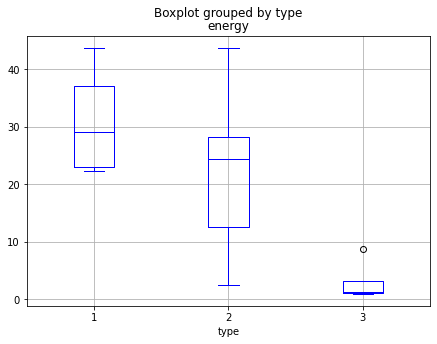

In [95]:
bats = pd.read_csv('bats.csv')
fig, ax = plt.subplots(figsize = (7, 5))
bats.boxplot(column = ['energy'], by = 'type', ax = ax, color = 'b')

In [99]:
import seaborn as sns

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='variable', ylabel='value'>

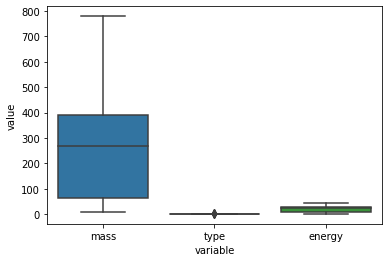

In [104]:
sns.boxplot(x="variable", y="value", data=pd.melt(bats))